In [1]:
# Task 1: House Price Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv(r"D:\Internship\Technohacks\Task1\kc_house_data.csv")
pd.set_option('display.max_columns', None)

In [4]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.tail(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
data.shape

(21613, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
data.duplicated().value_counts()

False    21613
dtype: int64

In [10]:
pd.set_option('display.float_format', '{:.5f}'.format)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# Split the data into features (X) and target (Y)
X = data[['bedrooms', 'bathrooms', 'sqft_living',
          'sqft_lot', 'floors', 'waterfront',
          'view', 'condition', 'grade',
          'sqft_above', 'sqft_basement', 'yr_built',
          'yr_renovated', 'zipcode', 'lat',
          'long', 'sqft_living15', 'sqft_lot15']]

Y = data[['price']]

In [13]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [14]:
# Explore the training data
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19642,4,2.50000,2070,4270,2.00000,0,0,3,8,2070,0,2010,0,98028,47.77300,-122.26500,2070,4610
8626,3,2.25000,1400,6970,2.00000,0,0,3,8,1400,0,1984,0,98006,47.54200,-122.18400,1800,8140
6954,5,3.00000,2190,4900,2.00000,0,0,5,7,1490,700,1940,0,98117,47.68920,-122.38600,1370,4606
20242,4,2.50000,2547,4800,2.00000,0,0,3,9,2547,0,2014,0,98092,47.25920,-122.19400,2598,4800
10376,5,3.50000,4060,8309,2.00000,0,0,3,9,2960,1100,2001,0,98028,47.75700,-122.22800,1730,11711


In [15]:
Y_train.head()

,price
19642,493000.00000
8626,425000.00000
6954,588000.00000
20242,392440.00000
10376,630000.00000


In [16]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1913,0,98019,47.73640,-121.98100,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1959,0,98133,47.73560,-122.33500,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,2014,0,98144,47.59020,-122.31100,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1968,0,98010,47.32990,-122.04600,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,2014,0,98022,47.19480,-121.97500,1670,4622


In [17]:
Y_test.head()

,price
3834,349950.00000
1348,450000.00000
20366,635000.00000
16617,355500.00000
20925,246950.00000


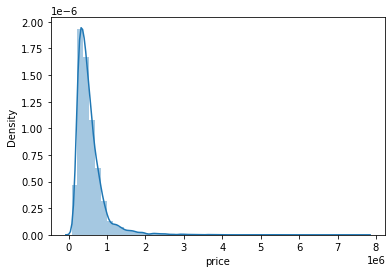

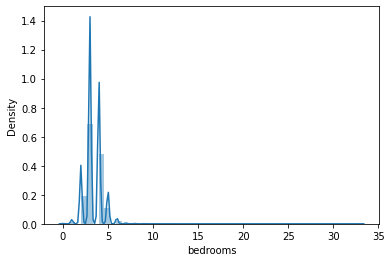

In [18]:
# Visualize the data
sns.distplot(data['price'])
plt.show()

sns.distplot(data['bedrooms'])
plt.show()


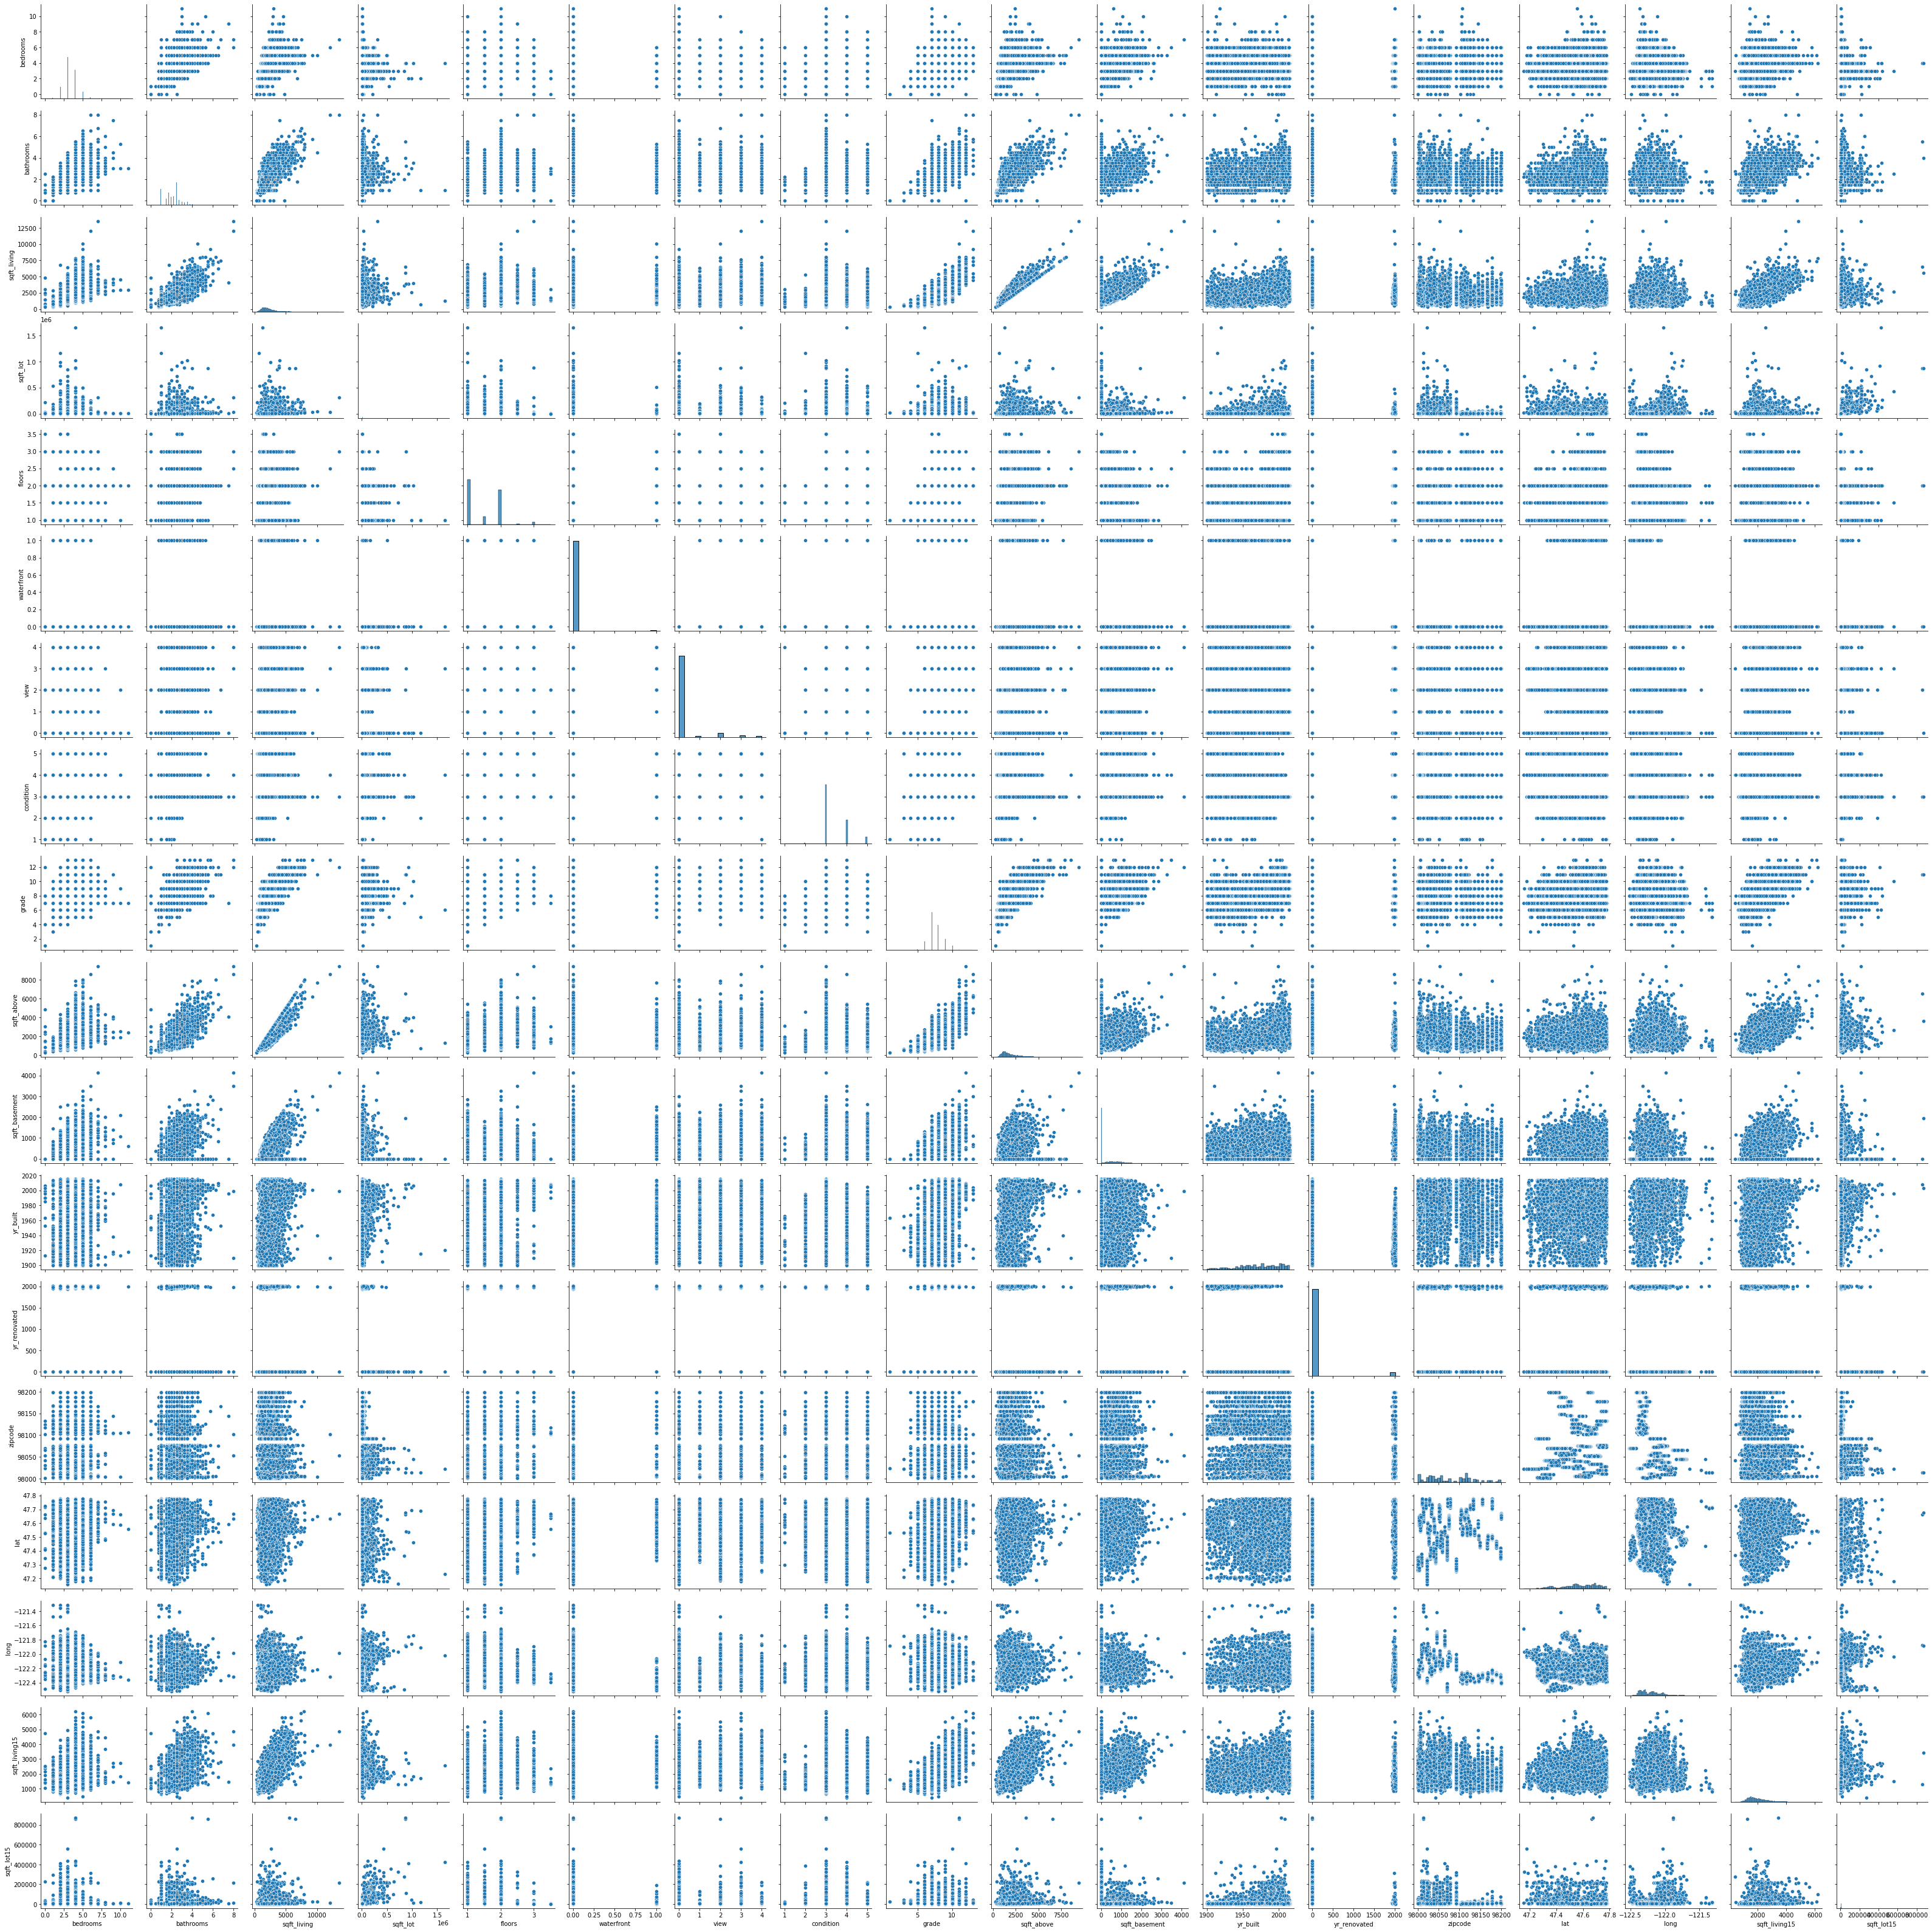

In [19]:
sns.pairplot(X_train)
plt.show()

In [20]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
Y_pred = lr.predict(X_test)

In [22]:
Y_pred

array([[542934.6747387 ],
       [630689.55927195],
       [502111.88508547],
       ...,
       [744090.42321232],
       [184841.06972362],
       [863394.78514577]])

In [23]:
# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R-squared: {r2:.5f}")

Mean Absolute Error: 124598.02116
R-squared: 0.70976


In [24]:
# Save the model and scaler using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Assuming scaler is your StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [25]:
# Load the original model and scaler used during training
lr = pickle.load(open('linear_regression_model.pkl', 'rb'))
scaler = pickle.load(open('standard_scaler.pkl', 'rb'))

# Make a prediction using the original model and scaler on the test set
original_prediction_test = lr.predict(scaler.transform(X_test))
print("Original Model Prediction on Test Set (Scaled Input):", original_prediction_test)

# Load the model and scaler
loaded_lr = pickle.load(open('linear_regression_model.pkl', 'rb'))
loaded_scaler = pickle.load(open('standard_scaler.pkl', 'rb'))

Original Model Prediction on Test Set (Scaled Input): [[7270331.96707849]
 [7809863.09319345]
 [7167044.91161155]
 ...
 [5919055.91543343]
 [5601745.14310921]
 [7087435.7213693 ]]


In [26]:
example_input = [[2, 2.5, 2070, 3400, 1, 0,0, 3, 8, 2070, 0, 2009, 0, 98026, 47.74, -122.35, 1899, 4451]]

In [27]:
original_prediction_test = lr.predict(scaler.transform(example_input))
print("Original Model Prediction on Test Set (Scaled Input):", original_prediction_test[0][0])

Original Model Prediction on Test Set (Scaled Input): 7942314.071200718


In [28]:
scaled_input_loaded = loaded_scaler.transform(example_input)
loaded_prediction_scaled = loaded_lr.predict(scaled_input_loaded)
print("Loaded Model Prediction (Scaled Input):", loaded_prediction_scaled[0][0])

Loaded Model Prediction (Scaled Input): 7942314.071200718
